In [1]:
# 27 Oct 2018
# calculate quantities relating to GEOMETRIC (see Marshall et al, 2012; Youngs et al, 2017)
# possibly some stuff to do with Mads?
# (see Waterman et al papers and the one with J. Lilly also)

from pydra_misc import *
from pydra_analysis import *
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

from casl import parameters, spectral, constants

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # "*_r" is reverse of standard colour
plt.rcParams["axes.formatter.limits"] = [-3, 3]

In [2]:
kt = 50

# data_dir = "/home/julian/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"
data_dir = "/home/mak/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"

t_now, qq = read_qq(data_dir, parameters.nx, parameters.ny, kt, num_frame = True)

# swap axis to have the indexing consistent with the Fortran code main_invert
qq = np.swapaxes(qq, 0, 1)

# no topography
fhb = np.zeros((parameters.ny + 1, parameters.nx))

x_vec = np.linspace(0, parameters.ellx, parameters.nx, endpoint = False)
y_vec = np.linspace(-parameters.elly / 2, parameters.elly / 2, parameters.ny + 1)



number of frames found = 751 


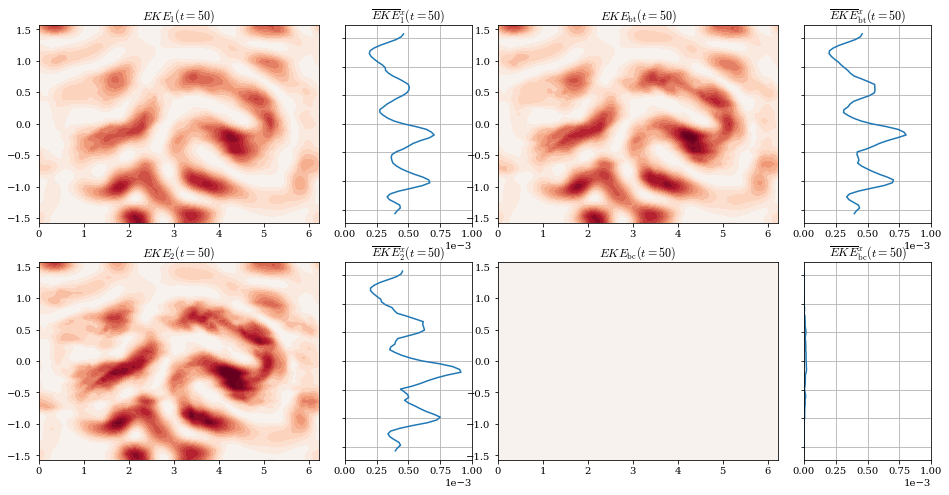

In [3]:
# plots of EKE

# Observation: baroclinic EKE is equally large with barotropic EKE as instability goes into nonlinear stage, then
#              decreases and eventually barotropic EKE dominates
#              EKE_bc as one measure of exhaustion of baroclinic processes?
#                 plot out <EKE_bc / (<EKE_bt> + <EKE_bc>) or something like that
#
# note also that correlations of modal quantities is NOT the same as the modal quantities of the correlations
#    (similarly for Fourier modes, e.g. <u'(k) v'(k)> is not <u'v'>(k), the latter is zero by definition with zonal avg)
# ? which one to use? probably quantities constructed from modes
#                     or maybe ditch modes all together?

kt = 500
lim_max = 0.002

eke_L1L2, eke_btbc = calc_eke(data_dir, parameters, constants, kt)
level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, eke_L1L2[:, :, 0], level_vec, extend = "max")
ax.set_title(r"$EKE_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, eke_L1L2[:, :, 1], level_vec, extend = "max")
ax.set_title(r"$EKE_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(eke_L1L2[:, :, 0]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(eke_L1L2[:, :, 1]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{2}^x (t = %g)$" % t_now)
ax.grid()

# modes
ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, eke_btbc[:, :, 0], level_vec, extend = "max")
ax.set_title(r"$EKE_{\rm bt} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, eke_btbc[:, :, 1], level_vec, extend = "max")
ax.set_title(r"$EKE_{\rm bc} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(eke_btbc[:, :, 0]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{\rm bt}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(eke_btbc[:, :, 1]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{\rm bc}^x (t = %g)$" % t_now)
ax.grid()

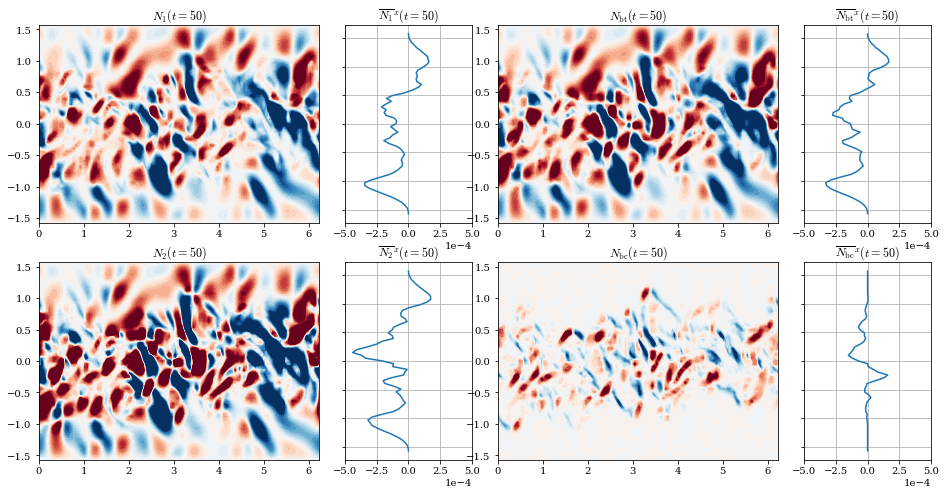

In [13]:
# generate the momentum related quantities
# M = <v'v' - u'u'> / 2
# N = <v'u'>

# Observation: baroclinic Reynolds stress is generally quite a bit smaller than barotropic Reynolds stresses

kt = 100
lim_max = 0.001
M_L1L2, N_L1L2, M_btbc, N_btbc = calc_geom_momentum(data_dir, parameters, constants, kt)

level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, N_L1L2[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$N_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, N_L1L2[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$N_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(N_L1L2[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(N_L1L2[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_2}^x (t = %g)$" % t_now)
ax.grid()

# modes
ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, N_btbc[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$N_{\rm bt} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, N_btbc[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$N_{\rm bc} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(N_btbc[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_{\rm bt}}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(N_btbc[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_{\rm bc}}^x (t = %g)$" % t_now)
ax.grid()

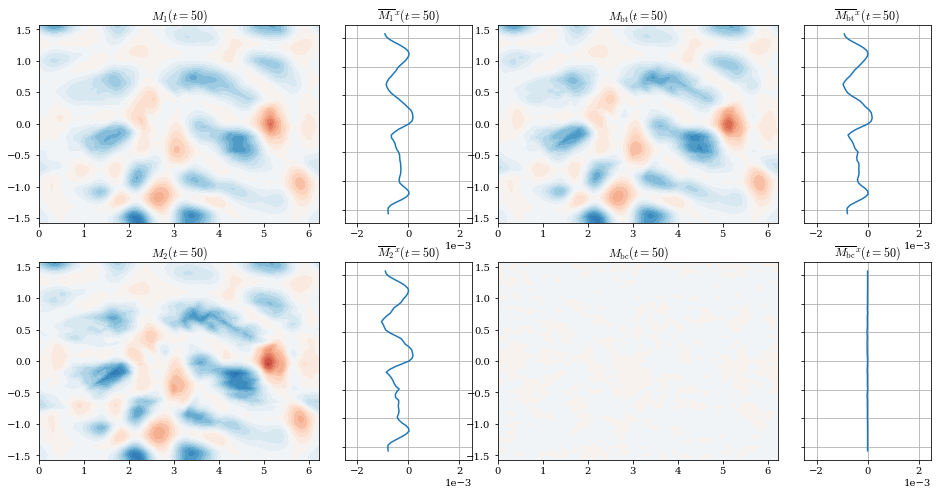

In [45]:
# Observation: baroclinic M is generally quite a bit smaller than barotropic M stresses
#              M seems to be persistent in the magnitude as well

kt = 500
lim_max = 0.005
M_L1L2, N_L1L2, M_btbc, N_btbc = calc_geom_momentum(data_dir, parameters, constants, kt)

level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, M_L1L2[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$M_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, M_L1L2[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$M_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(M_L1L2[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(M_L1L2[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_2}^x (t = %g)$" % t_now)
ax.grid()

# modes
ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, M_btbc[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$M_{\rm bt} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, M_btbc[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$M_{\rm bc} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(M_btbc[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_{\rm bt}}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(M_btbc[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_{\rm bc}}^x (t = %g)$" % t_now)
ax.grid()